In [ ]:
SpaceX Falcon 9 First Stage Landing Prediction

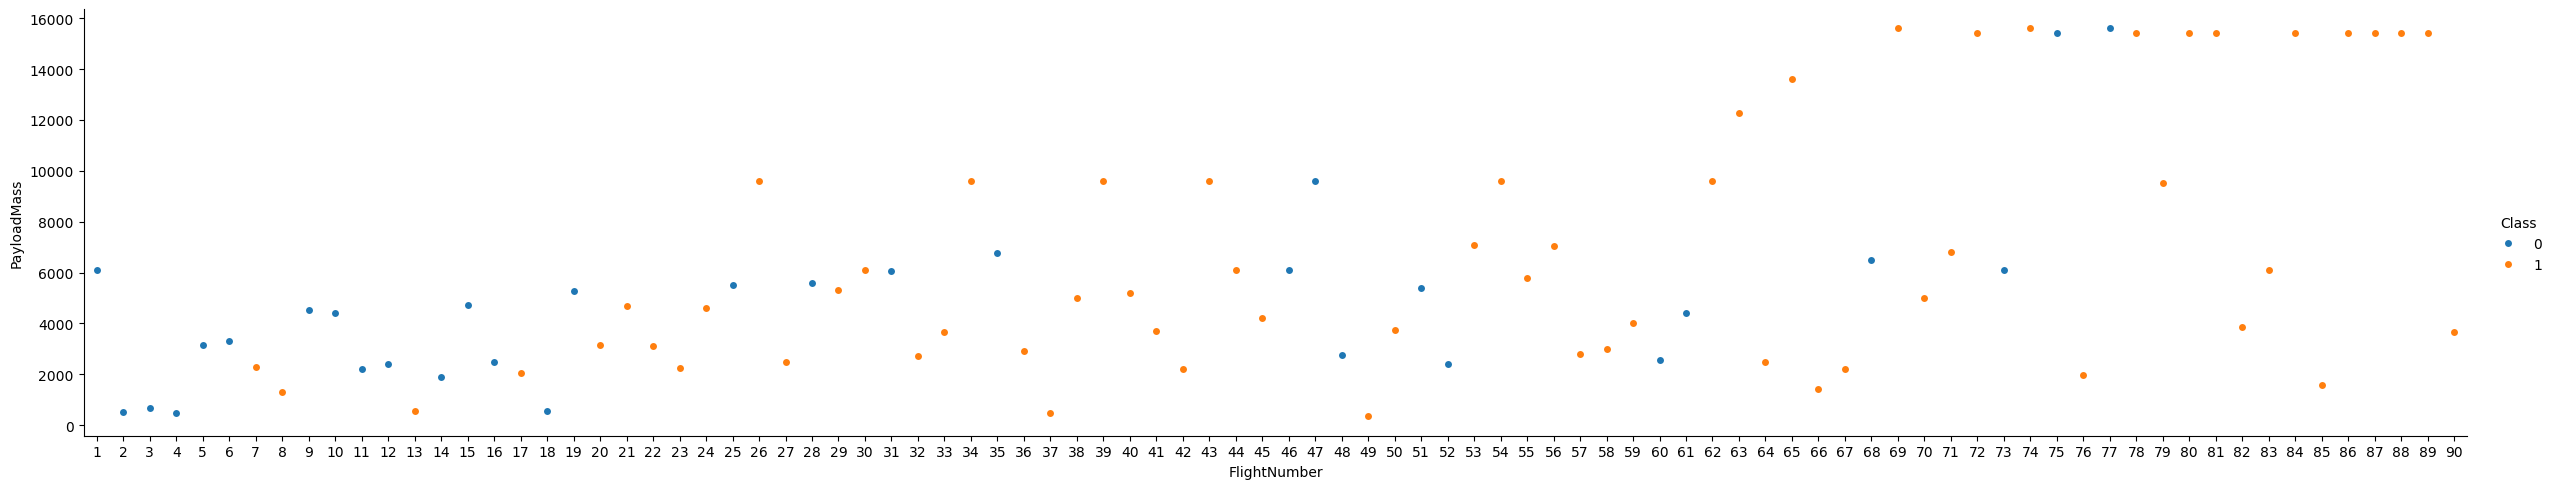

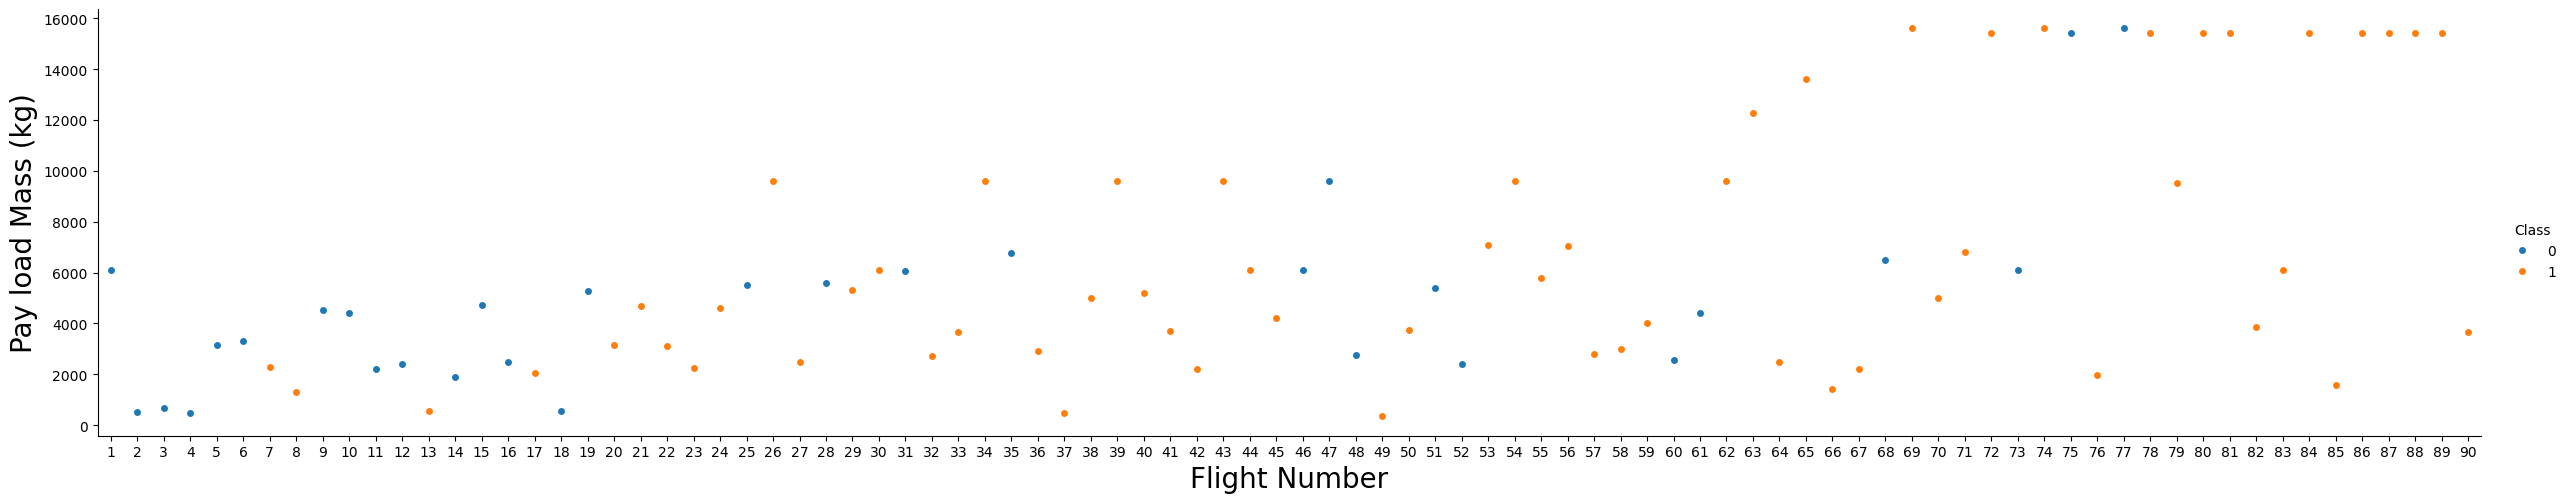

In [5]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()




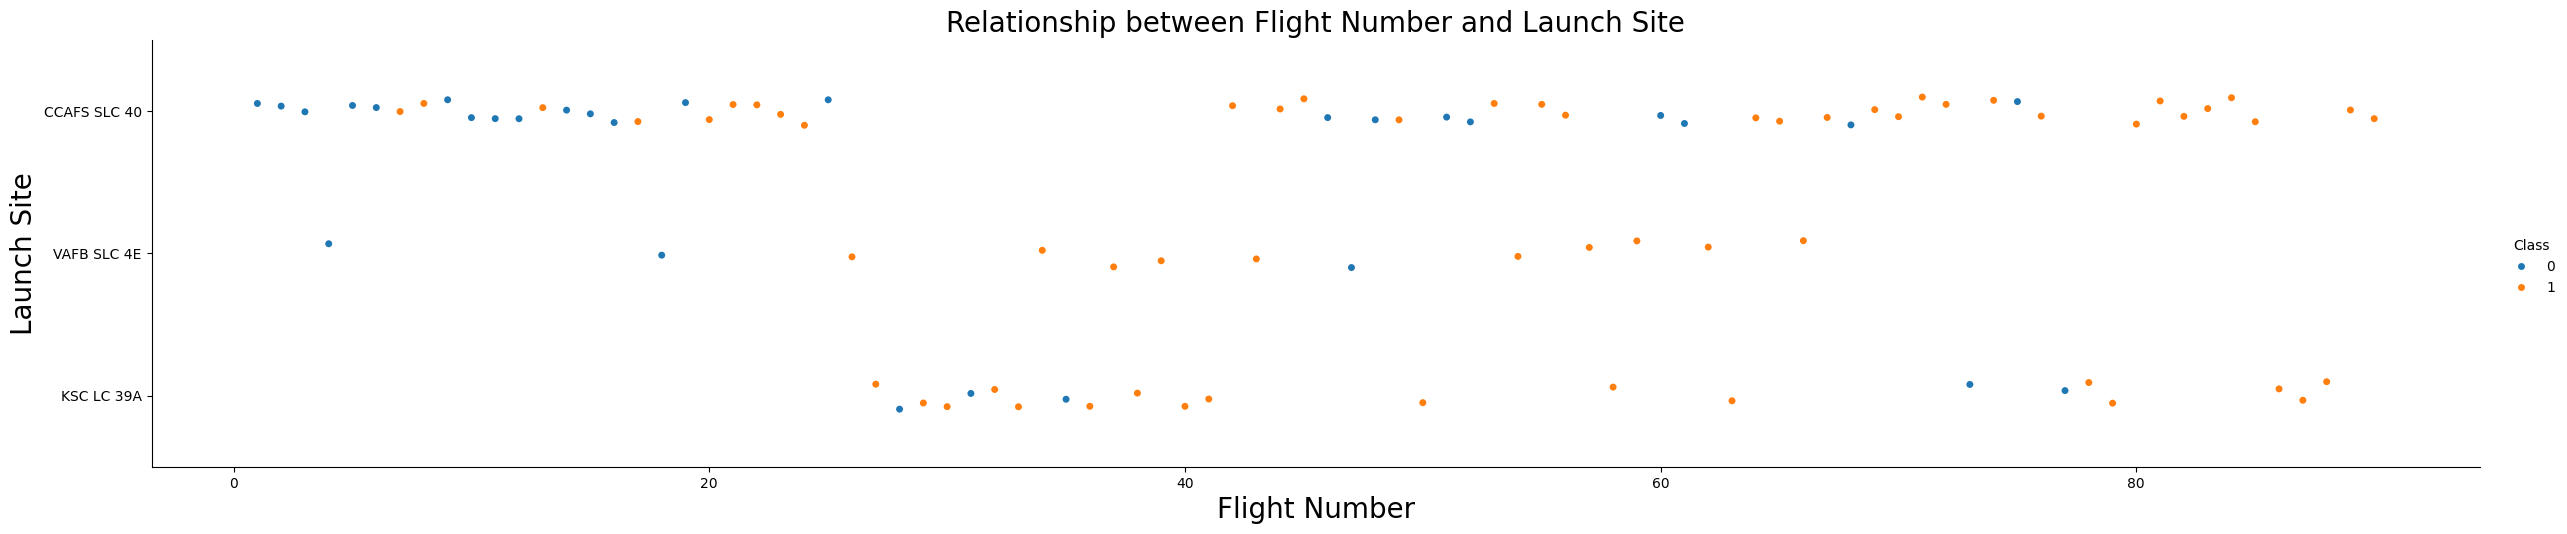

In [6]:
#TASK 1: Visualize the relationship between Flight Number and Launch Site
#Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'

# Visualizing the relationship between Flight Number and Launch Site
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Relationship between Flight Number and Launch Site", fontsize=20)
plt.show()


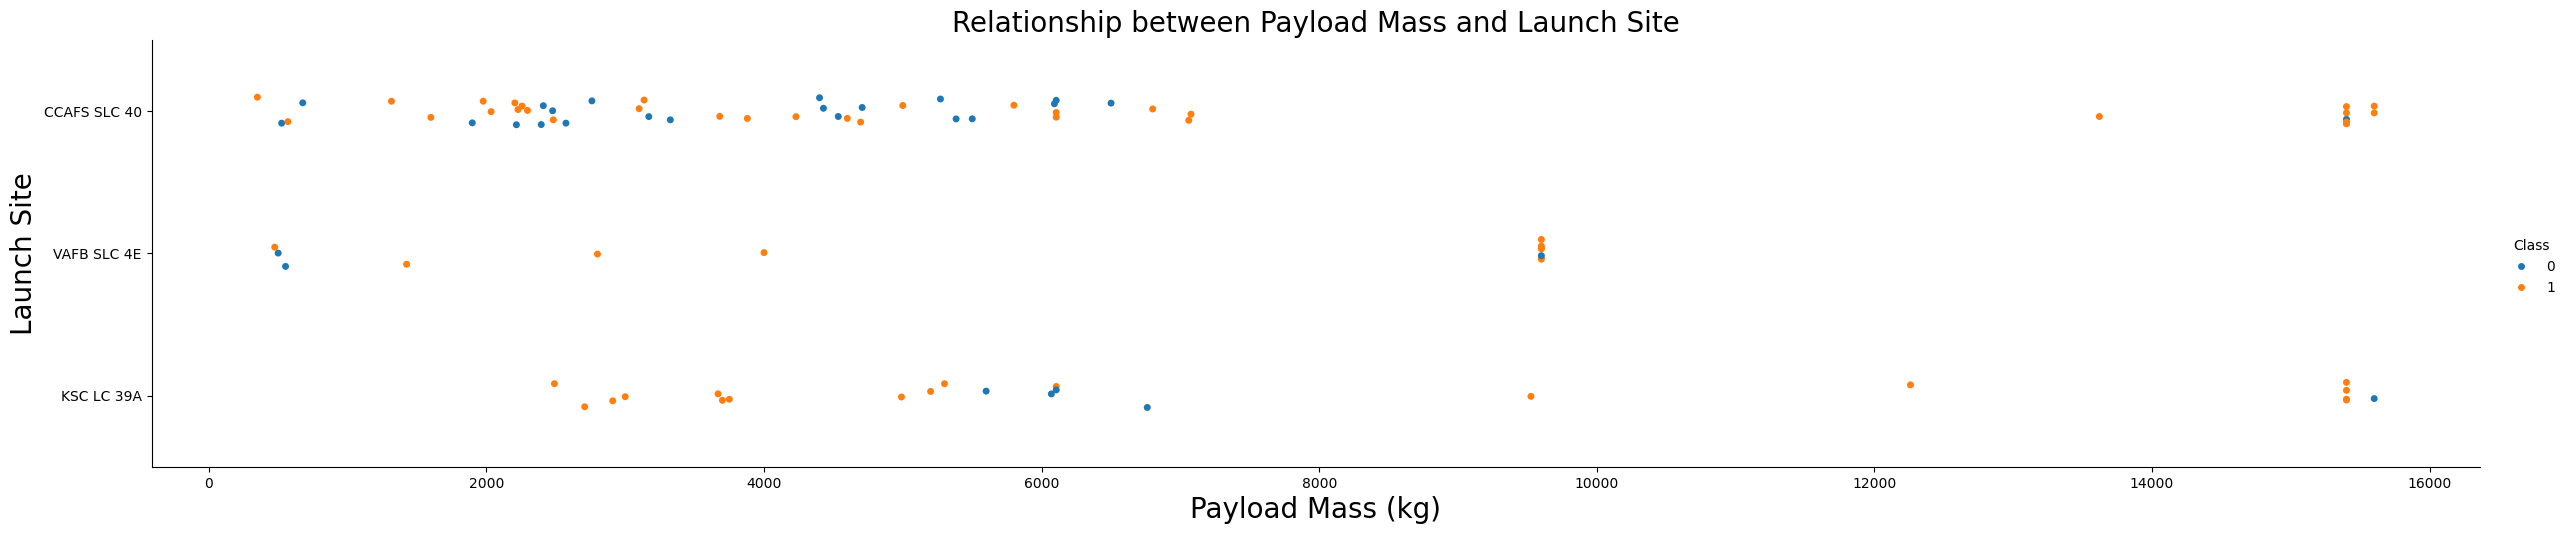

In [7]:
#TASK 2: Visualize the relationship between Payload Mass and Launch Site
# Visualizing the relationship between Payload Mass and Launch Site
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=5)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Relationship between Payload Mass and Launch Site", fontsize=20)
plt.show()


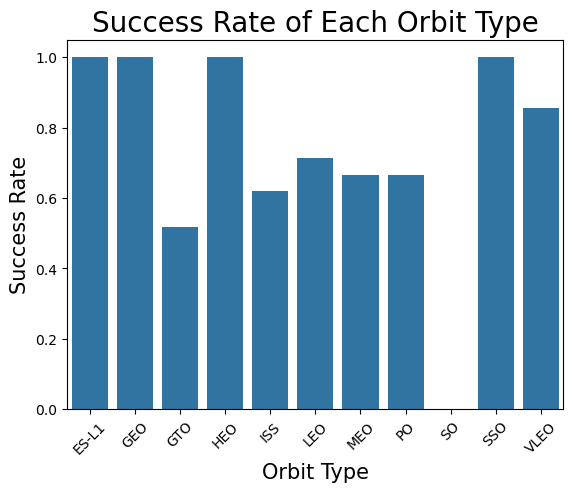

In [8]:
#TASK 3: Visualize the relationship between success rate of each orbit type
#Next, we want to visually check if there are any relationship between success rate and orbit type.

#Let's create a bar chart for the sucess rate of each orbit
# Calculate success rate for each orbit type
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Visualize the success rate of each orbit type as a bar chart
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate)
plt.xlabel('Orbit Type', fontsize=15)
plt.ylabel('Success Rate', fontsize=15)
plt.title('Success Rate of Each Orbit Type', fontsize=20)
plt.xticks(rotation=45)
plt.show()


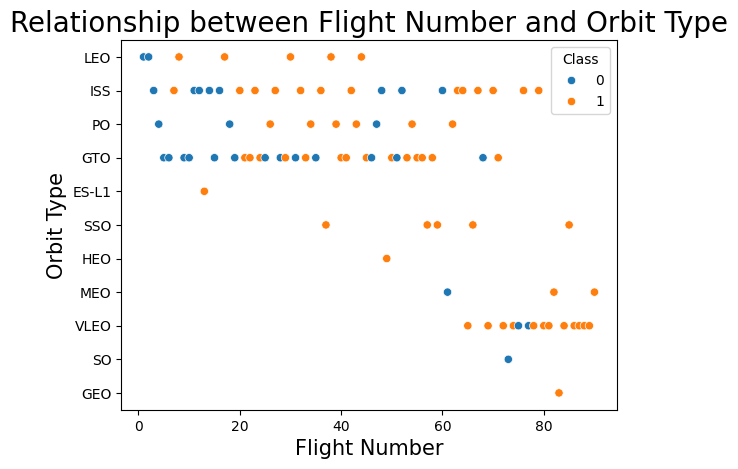

In [9]:
#TASK 4: Visualize the relationship between FlightNumber and Orbit type
#For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.
# Visualize the relationship between FlightNumber and Orbit type
sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data=df)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Relationship between Flight Number and Orbit Type", fontsize=20)
plt.show()


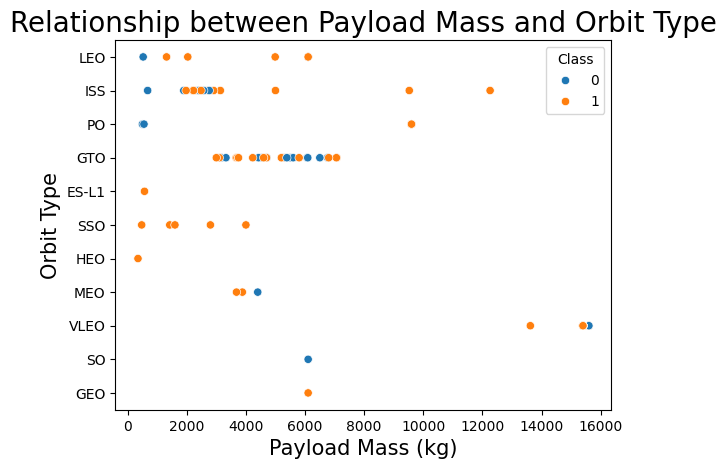

In [10]:
#TASK 5: Visualize the relationship between Payload Mass and Orbit type
#Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type
# Visualize the relationship between Payload Mass and Orbit type
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Relationship between Payload Mass and Orbit Type", fontsize=20)
plt.show()


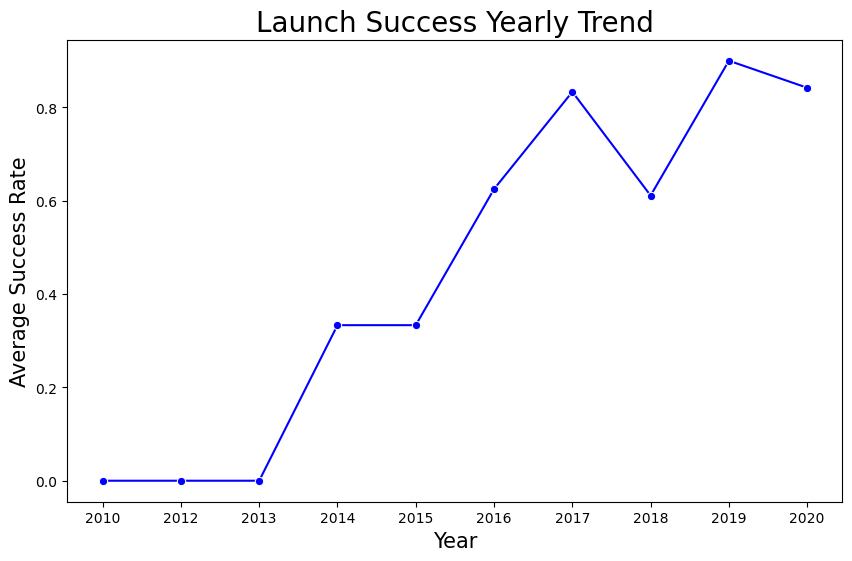

In [11]:
#TASK 6: Visualize the launch success yearly trend
#You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

#The function will help you get the year from the date:

# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
# Apply the function to create a 'Date' column with only the year
year = Extract_year()
df['Year'] = year  # Add the extracted year as a new column in the dataframe

# Calculate average success rate for each year
success_by_year = df.groupby('Year')['Class'].mean().reset_index()

# Plotting the line chart for launch success yearly trend
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Class', data=success_by_year, marker='o', color='b')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Success Rate', fontsize=15)
plt.title('Launch Success Yearly Trend', fontsize=20)
plt.show()


    


In [12]:
#Features Engineering
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [13]:
#TASK 7: Create dummy variables to categorical c
# Apply OneHotEncoding to the categorical columns: Orbit, LaunchSite, LandingPad, and Serial
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
features_one_hot = pd.get_dummies(df, columns=categorical_columns)

# Display the first 5 rows of the dataframe with the encoded columns
features_one_hot.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010-06-04,Falcon 9,6104.959412,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
1,2,2012-05-22,Falcon 9,525.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2013-03-01,Falcon 9,677.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2013-09-29,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
4,5,2013-12-03,Falcon 9,3170.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#TASK 8: Cast all numeric columns to float64
